In [1]:
import pandas as pd
import numpy as np

from imblearn.under_sampling import RandomUnderSampler

from utils import *
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

DATA_FOLDER = '../data/'
RANDOM_STATE = 8

# Data Description

In [2]:
cc_df = pd.read_csv(DATA_FOLDER + 'CC General.csv')

In [3]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
cc_df.shape

(8950, 18)

In [5]:
cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Fill Na


missing values ვავსებ შემდეგი ლოგიკით, თუ ცვლადში გვხვდება 0, მაშინ იმ ცვლადში Nan ვავსებ 0-ით. სხვა შემთხვევაში ვავსებ მედიანით.

In [6]:
fill_na_median(cc_df)

In [7]:
cc_df.isna().mean()

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [8]:
cc_df.columns[1:]

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# PCA

In [9]:
data, identifiers, df_pca = pca_data(cc_df, 'CUST_ID', 10, True)

PCA Result -  0.9192983251776005
Outlier is point if it is outlier in 5.0 Features


# Elbow Method

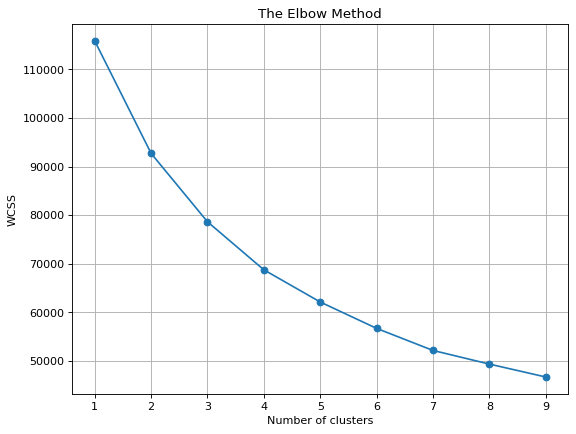

In [10]:
diff_clusters = cluster_in_range(df_pca, identifiers, range(1, 10))

In [11]:
diff_clusters

{1: cluster
 0    8881
 Name: count, dtype: int64,
 2: cluster
 1    5067
 0    3814
 Name: count, dtype: int64,
 3: cluster
 1    4378
 2    3253
 0    1250
 Name: count, dtype: int64,
 4: cluster
 2    3833
 1    3004
 3    1208
 0     836
 Name: count, dtype: int64,
 5: cluster
 4    2952
 0    2824
 1    1337
 2    1015
 3     753
 Name: count, dtype: int64,
 6: cluster
 1    2737
 0    2665
 3    1202
 2     930
 5     709
 4     638
 Name: count, dtype: int64,
 7: cluster
 1    2686
 0    1976
 3    1188
 6    1120
 2     896
 4     622
 5     393
 Name: count, dtype: int64,
 8: cluster
 7    2575
 2    1606
 6    1111
 3    1017
 5     875
 1     718
 4     600
 0     379
 Name: count, dtype: int64,
 9: cluster
 6    2241
 3    1531
 8    1090
 7    1046
 2     976
 0     710
 5     586
 4     367
 1     334
 Name: count, dtype: int64}

# Cluster Description

ამ Tool ის კონტექსტში საუკეთესო ცენტროიდების რაოდენობა მხოლოდ გეომეტრიული ასპექტით არ ფასდება, არამედ რამდენად შეგვიძლია ავხსნათ ეს სეგმენტები. ამისათვის შევიმუშავოთ custom F1-Score ის ცნება. როდესაც Decision Tree ის node ებით ავაწყობთ select ის ლოგიკას, ეს იყოს ჩვენი prediction ბი, ხოლო label იყოს ამ კონკრეტულ კლასტერში ჩავარდნილი წერტილები. ამ განმარტებებიდან გამომდინარე ჩვენ უკვე შეგვიძლია ამ select ის precision, recall - შესაბამისად f1_score ით შევაფასოთ თითოეული კლასტერი. თუ თითოეული კლასტერის შეფასების მეტრიკა გვაქვს, მაშინ შეგვიძლია კონკრეტული k ს შედეგიც შევაფასოთ

# Clusterization Tool Class

## Updated BinaryTree

In [12]:
from classes.ClusterDescriptionsNew import ClusterDescriptionsNew

In [13]:
cluster_desc_new = ClusterDescriptionsNew(data, df_pca, identifiers, range(2, 10))

cluster_desc_new.describe_clusters()

<-- Results for 2 clusters -->
F1-score: Weighted 0.9304, Macro 0.9273
Test F1-score: Weighted 0.9255, Macro 0.9220

<-- Results for 3 clusters -->
F1-score: Weighted 0.8761, Macro 0.8390
Test F1-score: Weighted 0.8711, Macro 0.8389

<-- Results for 4 clusters -->
F1-score: Weighted 0.8647, Macro 0.8187
Test F1-score: Weighted 0.8416, Macro 0.7991

<-- Results for 5 clusters -->
F1-score: Weighted 0.8714, Macro 0.8494
Test F1-score: Weighted 0.8511, Macro 0.8303

<-- Results for 6 clusters -->
F1-score: Weighted 0.8578, Macro 0.8486
Test F1-score: Weighted 0.8368, Macro 0.8274

<-- Results for 7 clusters -->
F1-score: Weighted 0.8475, Macro 0.8348
Test F1-score: Weighted 0.8348, Macro 0.8258

<-- Results for 8 clusters -->
F1-score: Weighted 0.8225, Macro 0.8142
Test F1-score: Weighted 0.8202, Macro 0.8098

<-- Results for 9 clusters -->
F1-score: Weighted 0.8075, Macro 0.7892
Test F1-score: Weighted 0.7948, Macro 0.7734



## Multi-Class DecisionTree

In [14]:
from classes.MultiClassClusterDescriptions import MultiClassClusterDescriptions

In [15]:
# Initialize the MultiClassClusterDescriptions object
multi_cluster_desc = MultiClassClusterDescriptions(data, df_pca, identifiers, range(2, 10))

# Generate descriptions for all clusters
multi_cluster_desc.describe_clusters()

<-- Results for 2 clusters -->
Train F1-score: Weighted 0.9207, Macro 0.9187
Test F1-score: Weighted 0.9152, Macro 0.9130

<-- Results for 3 clusters -->
Train F1-score: Weighted 0.8273, Macro 0.7674
Test F1-score: Weighted 0.8223, Macro 0.7648

<-- Results for 4 clusters -->
Train F1-score: Weighted 0.8825, Macro 0.8519
Test F1-score: Weighted 0.8575, Macro 0.8286

<-- Results for 5 clusters -->
Train F1-score: Weighted 0.8404, Macro 0.8133
Test F1-score: Weighted 0.8272, Macro 0.8026

<-- Results for 6 clusters -->
Train F1-score: Weighted 0.8236, Macro 0.7829
Test F1-score: Weighted 0.8043, Macro 0.7681

<-- Results for 7 clusters -->
Train F1-score: Weighted 0.7970, Macro 0.7430
Test F1-score: Weighted 0.7843, Macro 0.7406

<-- Results for 8 clusters -->
Train F1-score: Weighted 0.7791, Macro 0.7326
Test F1-score: Weighted 0.7658, Macro 0.7225

<-- Results for 9 clusters -->
Train F1-score: Weighted 0.7352, Macro 0.6364
Test F1-score: Weighted 0.7338, Macro 0.6412



In [16]:
multi_cluster_desc.evaluate(data, df_pca, 7)

{'macro_f1': 0.7426215440301762,
 'weighted_f1': 0.7944535047933045,
 'per_cluster_f1': {0: 0.831593281888334,
  1: 0.8675039801875111,
  2: 0.7394270122783083,
  3: 0.8842863574966231,
  4: 0.6270411495754409,
  5: 0.8117744610281924,
  6: 0.43672456575682383},
 'test_labels': array([1, 4, 5, ..., 6, 6, 6]),
 'y_pred': array([1, 4, 5, ..., 6, 1, 5])}

In [17]:
multi_cluster_desc.plot_decision_tree(4)

მულტიკლასის და ჩვეულებრივის binary 2 კლასტერზე იმიტომ არ ემთხვევა, რომ ჩვეულებრივის დროს თითოეულზე ცალკე არის დატრენინგებული და ამიტომ ერთიერთში არ ემთხვევა

# Compare

In [18]:
cluster_desc_new.plot_decision_tree(2, 0)

In [19]:
cluster_desc_new.plot_decision_tree(2, 1)

In [20]:
cluster_desc_new.descriptions[2]

{0: {'query': 'PURCHASES_FREQUENCY <= 0.577381.',
  'f1_score': 0.9509443528964381},
 1: {'query': 'PURCHASES_FREQUENCY > 0.577381. PURCHASES_FREQUENCY > 0.720780.',
  'f1_score': 0.9035603180089872}}

In [21]:
multi_cluster_desc.plot_decision_tree(n_clusters=2)